In [1]:
# First try to use the data to train a model
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'numpy'

In [18]:
# Load the dataset from the file
df = pd.read_csv('myData.csv', header = None)

df.head()

Dataset = df.values

In [19]:
starting_X = 3.0;
starting_Y = 0.0;
arr = np.zeros((1, 0));
X = np.empty(2100, dtype = object);
Y = np.empty(2100, dtype = object);

new_arr = np.empty((2100, 50));

for i in range(0, 2099):
    if i <= 300:
        true_X = starting_X - i*0.01;
        true_Y = starting_Y;
    elif i <= 600:
        true_X = 0.0 + (i-300)*0.01;
        true_Y = starting_Y + 0.5;
    elif i <= 900:
        true_X = starting_X - (i-600)*0.01;
        true_Y = starting_Y + 1.0;
    elif i <= 1200:
        true_X = 0.0 + (i-900)*0.01;
        true_Y = starting_Y + 1.5;
    elif i <= 1500:
        true_X = starting_X - (i-1200)*0.01;
        true_Y = starting_Y + 2.0;
    elif i <= 1800:
        true_X = 0.0 + (i-1500)*0.01;
        true_Y = starting_Y + 2.5;
    elif i <= 2100:
        true_X = starting_X - (i-1800)*0.01;
        true_Y = starting_Y + 3.0;
        
    new_arr[i,:] = np.array([true_X, true_Y, Dataset[i, 0], Dataset[i, 1], Dataset[i, 2], Dataset[i, 3], Dataset[i, 4], Dataset[i, 5], Dataset[i, 6], Dataset[i, 7], Dataset[i, 8], Dataset[i, 9], Dataset[i, 10], Dataset[i, 11], Dataset[i, 12], Dataset[i, 13], Dataset[i, 14], Dataset[i, 15], Dataset[i, 16], Dataset[i, 17], Dataset[i, 18], Dataset[i, 19], Dataset[i, 20], Dataset[i, 21], Dataset[i, 22], Dataset[i, 23], Dataset[i, 24], Dataset[i, 25], Dataset[i, 26], Dataset[i, 27], Dataset[i, 28], Dataset[i, 29], Dataset[i, 30], Dataset[i, 31], Dataset[i, 32], Dataset[i, 33], Dataset[i, 34], Dataset[i, 35], Dataset[i, 36], Dataset[i, 37], Dataset[i, 38], Dataset[i, 39], Dataset[i, 40], Dataset[i, 41], Dataset[i, 42], Dataset[i, 43], Dataset[i, 44], Dataset[i, 45], Dataset[i, 46], Dataset[i, 47]])

    
    
    
# print(arr)
# print (df)

        


In [20]:
# Machine Learning - Prepare the data

X = new_arr[:, 2:50];
Y = new_arr[:, 0:2];

# print(X[0,:])
# print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
# Machine Learning - Build the model

model = Sequential()

model.add(Dense(1536, activation = 'relu', input_shape = (48,))) # input layerr
model.add(Dropout(0.2))
model.add(Dense(768, activation = 'relu')) # input layerr
model.add(Dropout(0.1))
model.add(Dense(384, activation = 'relu')) # input layerr
model.add(Dense(192, activation = 'relu')) # input layerr
model.add(Dense(96, activation = 'relu')) # input layer
model.add(Dense(48, activation = 'relu')) # input layer
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'linear'))

model.summary()


# model.compile(loss = 'SparseCategori', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1536)              75264     
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_12 (Dense)            (None, 768)               1180416   
                                                                 
 dropout_3 (Dropout)         (None, 768)               0         
                                                                 
 dense_13 (Dense)            (None, 384)               295296    
                                                                 
 dense_14 (Dense)            (None, 192)               73920     
                                                                 
 dense_15 (Dense)            (None, 96)               

In [22]:
# Machine Learning - Train the model

model.fit(X_train, Y_train, epochs = 500, batch_size = 21, validation_data = (X_test, Y_test), verbose = 1)

Epoch 1/500
80/80 [==============================] - 2s 11ms/step - loss: 1.6931 - accuracy: 0.5000 - val_loss: 1.0988 - val_accuracy: 0.4833
Epoch 2/500
80/80 [==============================] - 1s 10ms/step - loss: 1.0166 - accuracy: 0.5018 - val_loss: 0.9255 - val_accuracy: 0.5000
Epoch 3/500
80/80 [==============================] - 1s 10ms/step - loss: 0.8444 - accuracy: 0.5149 - val_loss: 0.7554 - val_accuracy: 0.5214
Epoch 4/500
80/80 [==============================] - 1s 10ms/step - loss: 0.7253 - accuracy: 0.5393 - val_loss: 0.7235 - val_accuracy: 0.5881
Epoch 5/500
80/80 [==============================] - 1s 10ms/step - loss: 0.6719 - accuracy: 0.5673 - val_loss: 0.6404 - val_accuracy: 0.6024
Epoch 6/500
80/80 [==============================] - 1s 10ms/step - loss: 0.6289 - accuracy: 0.6315 - val_loss: 0.6371 - val_accuracy: 0.6905
Epoch 7/500
80/80 [==============================] - 1s 10ms/step - loss: 0.6248 - accuracy: 0.6625 - val_loss: 0.6815 - val_accuracy: 0.6452
Epoch 

In [23]:
# Machine Learning - Evaluate the model

mse = model.evaluate(X_test, Y_test, verbose = 1)
print("Mean Squared Error: ", mse)


14/14 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8429
Mean Squared Error:  [0.3019743263721466, 0.8428571224212646]


In [24]:
# Load the dataset from the file
test = pd.read_csv('myDataTest.csv', header = None)

test.head()

Dataset_Test = test.values

In [25]:
starting_X = 3.0;
starting_Y = 0.0;
arr = np.zeros((1, 0));
X_test_2 = np.empty(30, dtype = object);
Y_test_2 = np.empty(30, dtype = object);

new_arr_test = np.empty((30, 50));

for i in range(0, 29):
    if i <= 5:
        true_X = starting_X - i*0.6;
        true_Y = starting_Y;
    elif i <= 10:
        true_X = 0.0 + (i-5)*0.6;
        true_Y = starting_Y + 0.6;
    elif i <= 15:
        true_X = starting_X - (i-10)*0.6;
        true_Y = starting_Y + 1.2;
    elif i <= 20:
        true_X = 0.0 + (i-15)*0.6;
        true_Y = starting_Y + 1.8;
    elif i <= 25:
        true_X = starting_X - (i-20)*0.6;
        true_Y = starting_Y + 2.4;
    elif i <= 30:
        true_X = 0.0 + (i-25)*0.6;
        true_Y = starting_Y + 3.0;

        
    new_arr_test[i,:] = np.array([true_X, true_Y, Dataset_Test[i, 0], Dataset_Test[i, 1], Dataset_Test[i, 2], Dataset_Test[i, 3], Dataset_Test[i, 4], Dataset_Test[i, 5], Dataset_Test[i, 6], Dataset_Test[i, 7], Dataset_Test[i, 8], Dataset_Test[i, 9], Dataset_Test[i, 10], Dataset_Test[i, 11], Dataset_Test[i, 12], Dataset_Test[i, 13], Dataset_Test[i, 14], Dataset_Test[i, 15], Dataset_Test[i, 16], Dataset_Test[i, 17], Dataset_Test[i, 18], Dataset_Test[i, 19], Dataset_Test[i, 20], Dataset_Test[i, 21], Dataset_Test[i, 22], Dataset_Test[i, 23], Dataset_Test[i, 24], Dataset_Test[i, 25], Dataset_Test[i, 26], Dataset_Test[i, 27], Dataset_Test[i, 28], Dataset_Test[i, 29], Dataset_Test[i, 30], Dataset_Test[i, 31], Dataset_Test[i, 32], Dataset_Test[i, 33], Dataset_Test[i, 34], Dataset_Test[i, 35], Dataset_Test[i, 36], Dataset_Test[i, 37], Dataset_Test[i, 38], Dataset_Test[i, 39], Dataset_Test[i, 40], Dataset_Test[i, 41], Dataset_Test[i, 42], Dataset_Test[i, 43], Dataset_Test[i, 44], Dataset_Test[i, 45], Dataset_Test[i, 46], Dataset_Test[i, 47]])

    
    
    
print(new_arr_test[11,:])
# print (df)

[2.40000000e+00 1.20000000e+00 0.00000000e+00 9.86345831e-05
 1.70002796e-04 2.94991801e-04 3.13640718e-04 2.97603998e-04
 0.00000000e+00 5.55601964e-05 1.39332949e-04 0.00000000e+00
 0.00000000e+00 6.04454379e-05 0.00000000e+00 1.00778973e-04
 3.09492753e-04 3.23612642e-04 5.14996786e-04 6.03883842e-04
 1.13682937e-05 2.52433233e-04 4.28608160e-04 0.00000000e+00
 0.00000000e+00 1.98822566e-04 0.00000000e+00 3.43138436e-06
 6.99308787e-05 2.37714863e-04 2.14060363e-04 2.01804856e-04
 4.86203643e-05 1.26126492e-04 1.53103209e-04 0.00000000e+00
 0.00000000e+00 4.29760888e-05 0.00000000e+00 1.83330034e-05
 4.95439167e-05 2.17652332e-04 1.49906719e-04 1.22716308e-04
 2.19563547e-06 4.25320924e-05 6.52372748e-05 0.00000000e+00
 0.00000000e+00 1.47314730e-05]


In [26]:
# Machine Learning - Make predictions
X_test_test = new_arr_test[:, 2:50];
# X_test_test = scaler.transform(X_test_test)
# X_for_test = X_test_test[1, :];
Y_test_test = new_arr_test[:, 0:2];
# Y_for_test = Y_test_test[1, :];


y_old_pred = model.predict(X_test)


y_pred_x = y_old_pred[:, 0]
y_pred_y = y_old_pred[:, 1]

# Round the predicted values to the nearest integer
y_pred_x = np.rint(y_pred_x.flatten())
y_pred_y = np.rint(y_pred_y.flatten())

# Combine the predicted x and y values into a single array of (x, y) tuples
y_pred = np.stack((y_pred_x, y_pred_y), axis=1)

# Calculate accuracy score
mse = metrics.mean_squared_error(Y_test, y_pred)
print("Mean squared error for test data: ", mse)

X_test_test = scaler.transform(X_test_test)


y_old_pred = model.predict(X_test_test)

y_pred_x = y_old_pred[:, 0]
y_pred_y = y_old_pred[:, 1]

# Round the predicted values to the nearest integer
y_pred_x = np.rint(y_pred_x.flatten())
y_pred_y = np.rint(y_pred_y.flatten())

# Combine the predicted x and y values into a single array of (x, y) tuples
y_pred = np.stack((y_pred_x, y_pred_y), axis=1)

# Calculate accuracy score
mse = metrics.mean_squared_error(Y_test_test, y_pred)
print("Mean squared error for new data: ", mse)

14/14 [==============================] - 0s 2ms/step
Mean squared error for test data:  0.4024733333333334
1/1 [==============================] - 0s 17ms/step
Mean squared error for new data:  1.1573333333333333


14/14 [==============================] - 0s 2ms/step


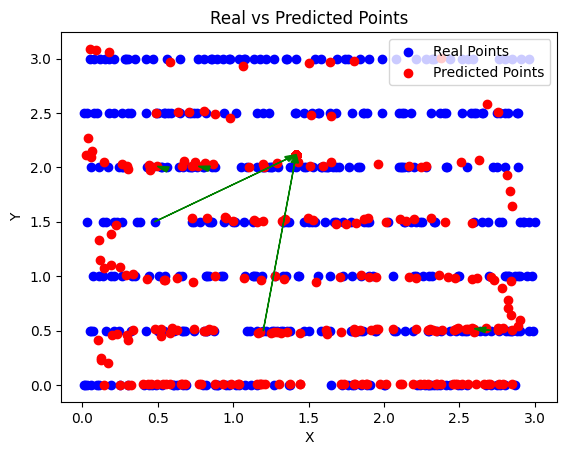

In [31]:

# Assume you have a trained model called "model"
# and a test set called X_test and y_test

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot showing the real points in blue
plt.scatter(Y_test[:,0], Y_test[:,1], color='blue', label='Real Points')

x_pred = y_pred[:, 0]
y_pred = y_pred[:, 1]

# Create a scatter plot showing the predicted points in red
plt.scatter(x_pred, y_pred, color='red', label='Predicted Points')

# Loop through each point in the test set
for i in range(20 , 25):
    # Get the x and y coordinates for the real and predicted points
    x_real, y_real = Y_test[i]
    x_pred_arrow = x_pred[i]
    y_pred_arrow = y_pred[i]
    
    # Add an arrow from the real point to the predicted point
    plt.arrow(x_real, y_real, x_pred_arrow - x_real, y_pred_arrow - y_real, 
              length_includes_head=True, head_width=0.05, color='green')
    
# Set the x-axis label to "X"
plt.xlabel('X')

# Set the y-axis label to "Y"
plt.ylabel('Y')

# Set the title of the plot to "Real vs Predicted Points"
plt.title('Real vs Predicted Points')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()